In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import r_regression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression,LassoLarsIC
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# Question Three

In [2]:
dibetes = pd.read_excel("./Diabetes_Data.xlsx")

In [3]:
dibetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
dibetes.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [5]:
features = ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
X = dibetes[features] # Feature Matrix
y = dibetes['Y'] # Target Variable

In [6]:
X.corr()  # Correlation Matrix of 10 Features

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


<Axes: >

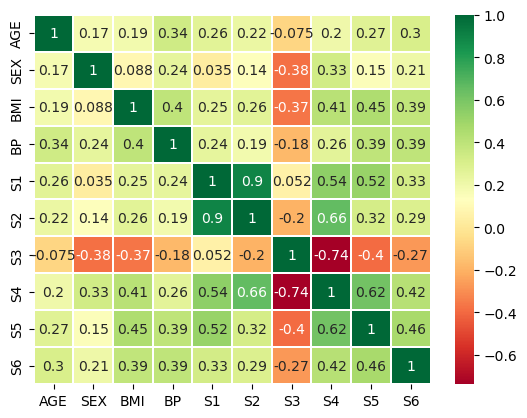

In [7]:
# make heat of features
sns.heatmap(X.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) #data.corr()-->correlation matrix

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 34.7 KB


In [9]:
model1 = LinearRegression() # Linear Regression Model
model1.fit(X, y) # Fit the model with the data

y_pred = model1.predict(X) # Predict the model with the data


print("R2 score: ", r2_score(y, y_pred)) # R2 score

print("Mean Squared Error: ", mean_squared_error(y, y_pred)) # Mean Squared Error

R2 score:  0.5177484222203498
Mean Squared Error:  2859.6963475867506


In [10]:
def forward_stepwise_selection(X, y, alpha=0.05):
    selected_vars = []
    remaining_vars = list(X.columns)
    while len(remaining_vars) > 0:
        p_values = []
        for var in remaining_vars:
            model = sm.OLS(y, sm.add_constant(X[selected_vars + [var]])).fit()
            p_value = model.pvalues[var]
            p_values.append((var, p_value))
        best_var, min_p_value = min(p_values, key=lambda x: x[1])
        if min_p_value < alpha:
            selected_vars.append(best_var)
            remaining_vars.remove(best_var)
        else:
            break
    return selected_vars

In [11]:
selected_features = forward_stepwise_selection(X, y) 

print("Selected Features: ", selected_features)

Selected Features:  ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']


In [12]:
X[selected_features]

,BMI,S5,BP,S1,SEX,S2
0,32.1,4.8598,101.00,157,2,93.2
1,21.6,3.8918,87.00,183,1,103.2
2,30.5,4.6728,93.00,156,2,93.6
3,25.3,4.8903,84.00,198,1,131.4
4,23.0,4.2905,101.00,192,1,125.4
...,...,...,...,...,...,...
437,28.2,4.9836,112.00,185,2,113.8
438,24.9,4.4427,75.00,225,2,166.0
439,24.9,4.1271,99.67,162,2,106.6
440,30.0,5.1299,95.00,201,1,125.2


In [13]:
model_with_selected_features = LinearRegression() # Linear Regression Model

model_with_selected_features.fit(X[selected_features], y) # Fit the model with the data

y_pred = model_with_selected_features.predict(X[selected_features]) # Predict the model with the data


print("R2 score: ", r2_score(y, y_pred)) # R2 score

print("Mean Squared Error: ", mean_squared_error(y, y_pred)) # Mean Squared Error

R2 score:  0.5148837959256445
Mean Squared Error:  2876.683251787016


# Question Four

In [14]:
titanic = pd.read_csv("./titanic3.csv")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [16]:
titanic.select_dtypes('int64').nunique()

pclass      3
survived    2
sibsp       7
parch       8
dtype: int64

In [17]:
titanic['age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

## 4.2

In [18]:
total_passengers = titanic['survived'].shape[0]
survived = titanic[titanic["survived"]==1].shape[0]

In [19]:
prob_of_survival = survived / total_passengers
print(f"Probability of Survival: {round(prob_of_survival,5)}")

Probability of Survival: 0.38197


## 4.3 

In [20]:
# survial rate for passenger class 1
passenger_class_one = titanic[titanic["pclass"]==1]
total_passengers_in_class_1 = passenger_class_one.shape[0]
survived_passengers_in_class_1 = passenger_class_one[passenger_class_one['survived']==1].shape[0]
prob_1 = survived_passengers_in_class_1/total_passengers_in_class_1
print(f"Survial rate for class one: {round(prob_1,5)}")

Survial rate for class one: 0.6192


In [21]:
# survial rate for passenger class 2
passenger_class_two = titanic[titanic["pclass"]==2]
total_passengers_in_class_2 = passenger_class_two.shape[0]
survived_passengers_in_class_2 = passenger_class_two[passenger_class_two['survived']==1].shape[0]
prob_2 = survived_passengers_in_class_2/total_passengers_in_class_2
print(f"Survial rate for class one: {round(prob_2,5)}")

Survial rate for class one: 0.4296


In [22]:
# survial rate for passenger class 3
passenger_class_three = titanic[titanic["pclass"]==3]
total_passengers_in_class_3 = passenger_class_three.shape[0]
survived_passengers_in_class_3 = passenger_class_three[passenger_class_three['survived']==1].shape[0]
prob_3 = survived_passengers_in_class_3/total_passengers_in_class_3
print(f"Survial rate for class one: {round(prob_3,5)}")

Survial rate for class one: 0.25529


In [23]:
print("="*30)
print ("| {:<10}| {:<15} |".format('Class','Probability'))
print("="*30)
print ("| {:<10}| {:<15} |".format('One',round(prob_1,4)))
print ("| {:<10}| {:<15} |".format('Two',round(prob_2,4)))
print ("| {:<10}| {:<15} |".format('Three',round(prob_3,4)))
print("="*30)

| Class     | Probability     |
| One       | 0.6192          |
| Two       | 0.4296          |
| Three     | 0.2553          |


In [24]:
# Define age intervals
age_intervals = pd.cut(titanic['age'], [0, 18, 40, 60])

# Group data by passenger class, sex, and age intervals
survival_table = titanic.groupby(['pclass', 'sex', age_intervals], observed=False)['survived'].mean()

# Convert the grouped series to a DataFrame and reset the index
survival_table = survival_table.reset_index()

# Rename columns for better readability
survival_table.columns = ['Pclass', 'Sex', 'Age', 'Survival Probability']

# Print the formatted survival table
print(survival_table)

    Pclass     Sex       Age  Survival Probability
0        1  female   (0, 18]              0.923077
1        1  female  (18, 40]              0.971429
2        1  female  (40, 60]              0.977273
3        1    male   (0, 18]              0.750000
4        1    male  (18, 40]              0.406250
5        1    male  (40, 60]              0.312500
6        2  female   (0, 18]              0.952381
7        2  female  (18, 40]              0.893939
8        2  female  (40, 60]              0.812500
9        2    male   (0, 18]              0.523810
10       2    male  (18, 40]              0.097087
11       2    male  (40, 60]              0.035714
12       3  female   (0, 18]              0.534483
13       3  female  (18, 40]              0.451220
14       3  female  (40, 60]              0.272727
15       3    male   (0, 18]              0.208333
16       3    male  (18, 40]              0.174274
17       3    male  (40, 60]              0.064516


In [25]:
# 4.4 Build Logistic Regression Model for Survival Rates

# Prepare the data
X = titanic[['pclass', 'sex', 'age']]
y = titanic['survived']

# Replace missing age values with the mean age

X['age'].fillna(X['age'].mean(), inplace=True)

# Convert categorical variable 'sex' to binary (0 or 1)
X['sex'] = X['sex'].map({'female': 0, 'male': 1})

# Add a constant (intercept) term to the independent variables
X = sm.add_constant(X)
 
# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

#  Get parameter estimates and p-values
parameter_estimates = result.params
p_values = result.pvalues
 

print(p_values)
# 
# # Summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.469029
         Iterations 6
const     7.721085e-33
pclass    9.834551e-29
sex       2.747720e-63
age       1.193900e-07
dtype: float64
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1305
Method:                           MLE   Df Model:                            3
Date:                Mon, 06 Nov 2023   Pseudo R-squ.:                  0.2947
Time:                        22:57:58   Log-Likelihood:                -613.96
converged:                       True   LL-Null:                       -870.51
Covariance Type:            nonrobust   LLR p-value:                6.892e-111
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [26]:
# Predict the test set
y_pred = result.predict(X)

# Define a threshold to classify as survived or not survived
threshold = 0.5
y_pred_class = (y_pred > threshold).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred_class)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_class)
print("Confusion Matrix:")
print(cm)
print(f"Classification Accuracy: {accuracy:.2%}")

Confusion Matrix:
[[685 124]
 [156 344]]
Classification Accuracy: 78.61%
